<a href="https://colab.research.google.com/github/laresamdeola/Machine-Learning/blob/main/Recommendation_System_for_Physiotherapy_using_Randomly_Generated_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler

In [2]:
# Number of data points
n = 1000

# Generate synthetic data
np.random.seed(42)
data = pd.DataFrame({
    'user_id': np.random.randint(1, 100, n),
    'exercise': np.random.choice(['Heel Slides', 'Ankle Pumps', 'Leg Raises'], n),
    'heart_rate': np.random.randint(60, 140, n),
    'bmi': np.random.uniform(18.5, 35, n),
    'duration': np.random.randint(5, 30, n),  # duration in minutes
    'intensity': np.random.choice(['Low', 'Medium', 'High'], n),
    'recovery': np.random.choice(['Improving', 'Worsening'], n)
})

print(data.head())

   user_id     exercise  heart_rate        bmi  duration intensity   recovery
0       52  Ankle Pumps         134  31.588812        19      High  Worsening
1       93   Leg Raises         139  23.726568         8    Medium  Improving
2       15   Leg Raises          63  32.643458        13       Low  Improving
3       72  Heel Slides          65  33.451364        23       Low  Improving
4       61  Ankle Pumps         117  23.068924        28       Low  Improving


In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical variables
label_encoder = LabelEncoder()
data['exercise_encoded'] = label_encoder.fit_transform(data['exercise'])
data['intensity_encoded'] = label_encoder.fit_transform(data['intensity'])
data['recovery_encoded'] = label_encoder.fit_transform(data['recovery'])

# Select relevant features
features = ['exercise_encoded', 'heart_rate', 'bmi', 'duration', 'intensity_encoded']
target = 'recovery_encoded'

# Normalize the data
scaler = StandardScaler()
data[features] = scaler.fit_transform(data[features])

print(data[features].head())


   exercise_encoded  heart_rate       bmi  duration  intensity_encoded
0         -1.224451    1.552635  1.007494  0.205082          -1.195059
1          1.231820    1.769108 -0.634333 -1.348570           1.221643
2          1.231820   -1.521290  1.227730 -0.642365           0.013292
3          0.003684   -1.434700  1.396440  0.770047           0.013292
4         -1.224451    0.816625 -0.771665  1.476252           0.013292


In [4]:
X = data[features]
y = data[target]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest

In [6]:
# Initialize and train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.495
              precision    recall  f1-score   support

           0       0.48      0.63      0.54        95
           1       0.53      0.37      0.44       105

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.49      0.49       200



Decision Tree

In [7]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# make predictions
y_pred_dt = dt_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

# get the probabilities from the model - to graph the ROC-Curve
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

Accuracy: 0.51
              precision    recall  f1-score   support

           0       0.49      0.52      0.50        95
           1       0.54      0.50      0.52       105

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



In [8]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# make predictions
y_pred_nb = nb_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))

# get the probabilities from the model - to graph the ROC-Curve
y_prob_nb = nb_model.predict_proba(X_test)[:, 1]

Accuracy: 0.515
              precision    recall  f1-score   support

           0       0.49      0.71      0.58        95
           1       0.56      0.34      0.43       105

    accuracy                           0.52       200
   macro avg       0.53      0.52      0.50       200
weighted avg       0.53      0.52      0.50       200



XGBoost

In [9]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# make predictions
y_pred_xgb = xgb_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

# get the probabilities from the model - to graph the ROC-Curve
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

Accuracy: 0.53
              precision    recall  f1-score   support

           0       0.50      0.63      0.56        95
           1       0.57      0.44      0.49       105

    accuracy                           0.53       200
   macro avg       0.54      0.53      0.53       200
weighted avg       0.54      0.53      0.53       200



Logistic Regression

In [10]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# make predictions
y_pred_lr = lr_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

# get the probabilities from the model - to graph the ROC-Curve
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

Accuracy: 0.515
              precision    recall  f1-score   support

           0       0.49      0.75      0.59        95
           1       0.57      0.30      0.40       105

    accuracy                           0.52       200
   macro avg       0.53      0.53      0.50       200
weighted avg       0.53      0.52      0.49       200



SVM

In [11]:
svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)

# make predictions
y_pred_svm = svm_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

# get the probabilities from the model - to graph the ROC-Curve
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]

Accuracy: 0.5
              precision    recall  f1-score   support

           0       0.48      0.72      0.58        95
           1       0.54      0.30      0.39       105

    accuracy                           0.50       200
   macro avg       0.51      0.51      0.48       200
weighted avg       0.51      0.50      0.48       200



Stacking Classifier

In [12]:
estimators = [
    ('dt', DecisionTreeClassifier()),
    ('nb', GaussianNB()),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('lr', LogisticRegression()),
    ('svm', SVC(probability=True))
]

stacking_model = StackingClassifier(estimators=estimators, final_estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
stacking_model.fit(X_train, y_train)
y_prob_stacking = stacking_model.predict_proba(X_test)[:, 1]

# make predictions
y_pred_stacking = stacking_model.predict(X_test)

# evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_stacking))
print(classification_report(y_test, y_pred_stacking))

Accuracy: 0.475
              precision    recall  f1-score   support

           0       0.45      0.53      0.49        95
           1       0.50      0.43      0.46       105

    accuracy                           0.48       200
   macro avg       0.48      0.48      0.47       200
weighted avg       0.48      0.47      0.47       200



In [13]:
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_nb, tpr_nb, _ = roc_curve(y_test, y_prob_nb)
roc_auc_nb = auc(fpr_nb, tpr_nb)

fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
roc_auc_lr = auc(fpr_lr, tpr_lr)

fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_stacking, tpr_stacking, _ = roc_curve(y_test, y_prob_stacking)
roc_auc_stacking = auc(fpr_stacking, tpr_stacking)

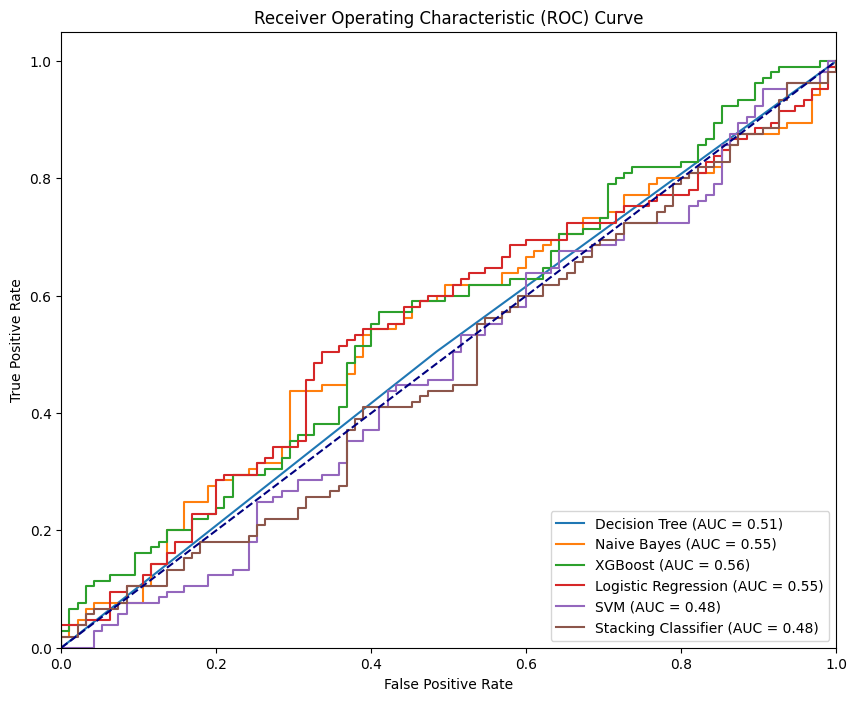

In [14]:
plt.figure(figsize=(10, 8))

plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_nb, tpr_nb, label=f'Naive Bayes (AUC = {roc_auc_nb:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM (AUC = {roc_auc_svm:.2f})')
plt.plot(fpr_stacking, tpr_stacking, label=f'Stacking Classifier (AUC = {roc_auc_stacking:.2f})')

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()